In [1]:
import tensorflow as tf
from tensorflow import image
from tensorflow.keras import layers, models, preprocessing
import matplotlib.pyplot as plt
import pathlib
import numpy as np
import cv2
print(tf.__version__)

2.1.0


**Need to figure out the driver script bit, will save this file in final form as a .py file then will import it into the driver script and run it like Classify-Knee-Laterality-Model.Classify(train_images, train_labels, ...). Need to look up examples of driver scripts ***

In [2]:
# from titles get labels 
# after extracting labels separate into training, validation and testing sets

In [3]:
# this stuff should probs go into the driver script
import random

data_dir = "AKOA_Analysis"

data_dir = pathlib.Path(data_dir)

print('total images', len(list(data_dir.glob('*.png'))))

left_images = list(data_dir.glob('*left*.png'))
left_underscored = list(data_dir.glob('*L_E_F_T*.png'))
left_images = left_images + left_underscored
print('left images', len(left_images))

right_images = list(data_dir.glob('*right*.png'))
right_underscored = list(data_dir.glob('*R_I_G_H_T*.png'))
right_images = right_images + right_underscored
print('right count', len(right_images))

print('sum ', len(right_images)+len(left_images))

#need to normalise stuff

total images 10023
left images 4400
right count 5623
sum  10023


TODO Need to randomise the collection of images, then take a selection for training, testing (10%??) and validation. 
then do the binary CNN.
It might be good to create a labels array for the things, so if left is in title then that one has a left label assigned to it (??). This would incoporate into the previous iteration of the CNN decently. 

Note in README, mention packages used, format of data to be inputted, the required version of tensorflow

In [18]:
# this stuff should probs go into the driver script
# Randomising the collection of images

total_images = list(data_dir.glob('*.png'))
print('total images first', total_images[1])
random.seed(12)
random.shuffle(total_images)
print('total images first post shuffle', total_images[1])

# want to extract the labels for 
# Need to take a selection for training, testing and validation 

total images first AKOA_Analysis\OAI9292081_BaseLine_3_de3d1_SAG_3D_DESS_WE_LEFT.nii.gz_22.png
total images first post shuffle AKOA_Analysis\OAI9501369_BaseLine_100_de3d1_SAG_3D_DESS_WE_LEFT.nii.gz_11.png


In [43]:
# this stuff should probs go into the driver script
total_images_labels =np.array([None]*len(total_images))
left = ["left", "l_e_f_t"]
right = ["right", "r_i_g_h_t"]

for i in range(len(total_images)):
    path = total_images[i]
    path = str(path).lower()
    total_images_labels = total_images_labels.reshape((10023,1))
    if any(x in path for x in left):
        total_images_labels[i] =0 #left
    elif any(x in path for x in right):
        total_images_labels[i] =1 #right
    else:
        print(total_images[i])

#total_labels = total_images_labels.reshape((10023,1))
#print(total_images_labels)
#print(total_images[8])
print(total_images_labels.shape)

(10023, 1)


In [44]:
# this stuff should probs go into the driver script
# only using the non-tf packages for the preprocessing of data
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


https://www.kaggle.com/abhmul/python-image-generator-tutorial <- loop at Input 19, shouldn't be too hard to convert what you have to this format
https://colab.research.google.com/drive/1WnvxjwQaQzt5bhXbE2EVuFC8DG-59Gmu?usp=sharing
https://towardsdatascience.com/10-minutes-to-building-a-cnn-binary-image-classifier-in-tensorflow-4e216b2034aa

In [66]:
# this stuff should probs go into the driver script
# read in all the images to the list 

# might be better to have this as an iterator/generator: checkout Assignments/Prac Notes/Coding Exercise
loaded_images = np.array([None]*total_images_labels.shape[0])
#loaded_images = tf.Variable(0)
for i in range(len(total_images)):
    #loade_images[i] = tf.image.resize(total_images[i])
    #loaded_images[i] = plt.imread(total_images[i]).reshape((1, 228, 260, 3))
    
    #total_images[i]= plt.imread(total_images[i])
    #new
    #loaded_images.append(img_data)
    loaded_images[i] = cv2.resize(plt.imread(total_images[i]),(64,64)).reshape((1,64,64,3)) #may want to change this size


In [67]:
print(loaded_images[i].shape)
print(loaded_images.shape)

(1, 64, 64, 3)
(10023,)


In [68]:
# this stuff should probs go into the driver script
def conv_tensor(arg):
    arg = tf.convert_to_tensor(arg, dtype=tf.float32)
    return arg

#fixing the shape of the images data
print(loaded_images.shape)
print(loaded_images[1].shape)
#for i in range(len(loaded_images)):
#loaded_images_2 = loaded_images.reshape((10023, 228, 260, 3))
loaded_images =np.concatenate(loaded_images, axis=0)
#loaded_images = conv_tensor(loaded_images)
print(loaded_images.shape)
#print(loaded_images[5])

(10023,)
(1, 64, 64, 3)
(10023, 64, 64, 3)


In [71]:
#X = loaded_images[1:4]
X = [1, 2, 3]
Y = total_images_labels[1:4]
train_images, test_images, train_labels, test_labels = train_test_split(X,Y,train_size=0.75,test_size=0.25, random_state=101)
print(train_images)
print(test_images)
print(loaded_images)

[1, 2]
[3]
[[[[0.12178692 0.12178692 0.12178692]
   [0.08784084 0.08784084 0.08784084]
   [0.08879443 0.08879443 0.08879443]
   ...
   [0.04172028 0.04172028 0.04172028]
   [0.02205882 0.02205882 0.02205882]
   [0.00823759 0.00823759 0.00823759]]

  [[0.07622167 0.07622167 0.07622167]
   [0.12025123 0.12025123 0.12025123]
   [0.1189951  0.1189951  0.1189951 ]
   ...
   [0.10390625 0.10390625 0.10390625]
   [0.12340686 0.12340686 0.12340686]
   [0.10364583 0.10364583 0.10364583]]

  [[0.09286918 0.09286918 0.09286918]
   [0.13664982 0.13664982 0.13664982]
   [0.07293199 0.07293199 0.07293199]
   ...
   [0.10870098 0.10870098 0.10870098]
   [0.08088236 0.08088236 0.08088236]
   [0.11677773 0.11677773 0.11677773]]

  ...

  [[0.08235294 0.08235294 0.08235294]
   [0.10744102 0.10744102 0.10744102]
   [0.09821921 0.09821921 0.09821921]
   ...
   [0.10573683 0.10573683 0.10573683]
   [0.1231273  0.1231273  0.1231273 ]
   [0.08556603 0.08556603 0.08556603]]

  [[0.10612746 0.10612746 0.106127

[0]


Text(0.5, 0, "tf.Tensor([b'0'], shape=(1,), dtype=string)")

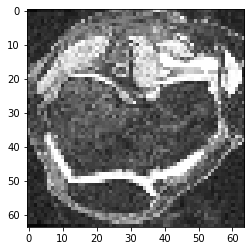

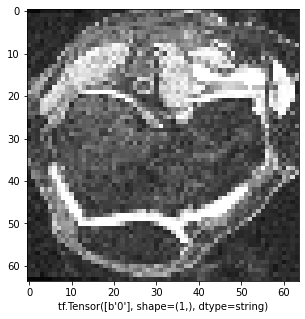

In [95]:
# this stuff should probs go into the driver script


train_images, test_images, train_labels, test_labels = train_test_split(loaded_images,total_images_labels,train_size=0.75,test_size=0.25, random_state=101)

plt.imshow(train_images[4])
print(train_labels[4])
train_images = conv_tensor(train_images)
test_images = conv_tensor(test_images)
train_labels = conv_tensor(train_labels)
test_labels = conv_tensor(test_labels)

plt.figure(figsize=(5,5))
#print(img1.shape)
# TODO I don't think the stuff is in the right format yet. 
#Might need to reshape it so in form e.g. images: (10023, 228, 260,3), labels: (10023, 1)
plt.imshow(train_images[4])
plt.xlabel(tf.strings.as_string(train_labels[4], precision=0.0))
#print(train_images[4].shape)
#tf.print(train_labels[4])
#plt.imshow(test_images[4])
#plt.xlabel(tf.print(test_labels[4]))


In [90]:
#Function for model
laterality = ['left', 'right']
n_laterality = len(laterality)


"""Model for binary classification """
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation ='relu',padding='same', input_shape = (64, 64, 3)),
    #tf.keras.layers.Conv2D(128,(3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.25),

    #tf.keras.layers.Conv2D(32,(3,3), activation='relu',padding='same'),
    #tf.keras.layers.Conv2D(256,(3,3), activation='relu',padding='same'),
    #tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.25),
    
    #tf.keras.layers.Conv2D(64,(3,3), activation='relu',padding='same'),
    #tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
#activation sigmoid and corresponding loss function

#this below stuff may end up going into the driver script ??
model.summary()
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics =['accuracy'])

#fit the keras model to the dataset
history=model.fit(train_images,train_labels,batch_size=32, epochs=10, validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               2097280   
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 129       
Total params: 2,097,857
Trainable params: 2,097,857
Non-trainable params: 0
_________________________________________________________________
Train on 7517 samples, validate on 2506 samples
Epoch 1/10
7517/7517 [==============================] - 6s 774

KeyboardInterrupt: 